In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [38]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
    

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

([<matplotlib.patches.Wedge at 0x23f024bbfa0>,
 [Text(-0.8823432229396718, 0.656864093197697, 'Loyal'),
  Text(0.8823431237559431, -0.6568642264278096, 'Left')],
 [Text(-0.4812781216034573, 0.358289505380562, '79.6%'),
  Text(0.48127806750324165, -0.35828957805153244, '20.4%')])

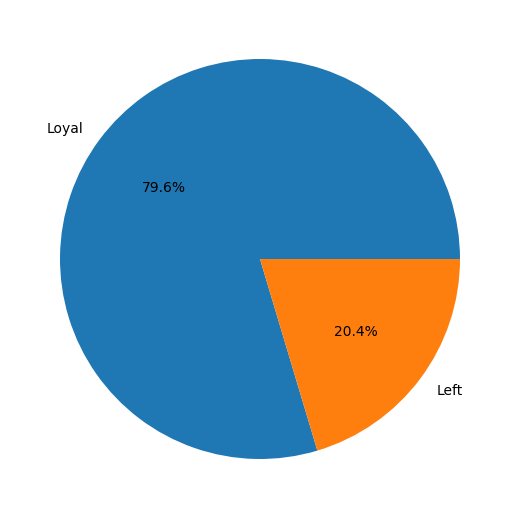

In [46]:
proportion_of_exited = churn_data['Exited'].value_counts() # с помощью метода value_counts посмотрим соотношение  ушедших

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    proportion_of_exited,
    labels= ['Loyal',  'Left'] ,
    autopct= '%.1f%%')

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

C:\Users\Kaiya07\AppData\Local\Temp\ipykernel_5812\3082307134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


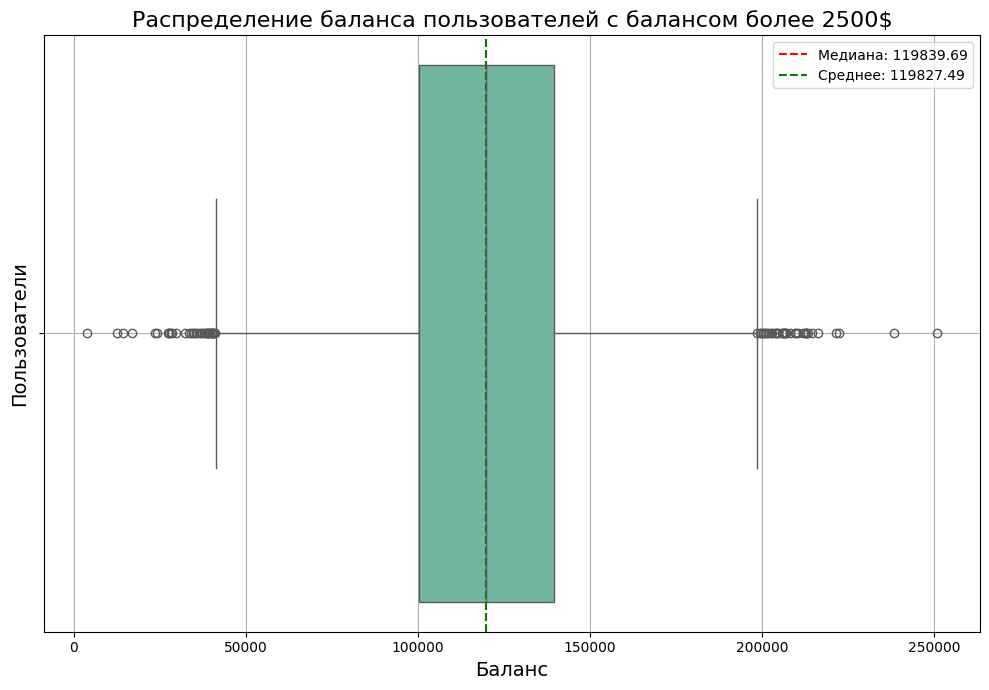

Медиана баланса: 119839.69
Средний баланс: 119827.49


In [60]:
filtered_churn_data = churn_data[churn_data['Balance'] > 2500]

# Настройка графика
plt.figure(figsize=(10, 7))

# Создание boxplot
boxplot = sns.boxplot(
    data=filtered_churn_data,
    x='Balance',
    orient='h',
    width=0.9,
    palette='Set2'
)

# Вычисление статистических показателей
median_balance = filtered_churn_data['Balance'].median()
mean_balance = filtered_churn_data['Balance'].mean()

# Настройка заголовка и меток
boxplot.set_title('Распределение баланса пользователей с балансом более 2500$', fontsize=16)
boxplot.set_xlabel('Баланс', fontsize=14)
boxplot.set_ylabel('Пользователи', fontsize=14)
boxplot.grid(True)

plt.axvline(median_balance, color='r', linestyle='--', label=f'Медиана: {median_balance:.2f}')
plt.axvline(mean_balance, color='g', linestyle='--', label=f'Среднее: {mean_balance:.2f}')
plt.legend()

# Оптимизация размещения графика
plt.tight_layout()

# Отображение графика
plt.show()

# Выводы
print(f'Медиана баланса: {median_balance:.2f}')
print(f'Средний баланс: {mean_balance:.2f}')